This is the analysing file of an 'Indeed AI Job' project.

All differences are calculated with cosine similarity.

**Frequency Algorithm(FREQ_alg())**\
Weighted count frequency of words in job vs corresponding competence. So if a word exists more frequently in a competence discription, it is understood as 'more important'.\
\
**TFIDF Algorithm(TFIDF_alg())**\
Essentially the same as to what the fequency algorithm was going to. Difference is: TFIDF is a library and not made from scratch, which the other is.\
\
**Spacy Algorithm(Spacy_alg())**\
Uses a pre trained Convolutional Neural Network(CNN) to predict paragraphs of text, takes context into account. Specifically designed for named entity recognition.\
\
**TensorFlow Algorithm(Tensorflow_alg())**\
Google's universal-sentence-encoder pre trained model, used for sentence similarity. Takes  full paragraphs into account.\
\
**BERT Algorithm(BERT_alg())**\
Newer version of Google's universal-sentence-encoder pre trained model, although it is made for single sentences only, so lacks in context.\
\
**MPnet Algorithm(MPnet_alg())**\
According to 'huggingface', at the time the best performing (f-score) pre trained sentence encoder.

In [ ]:
%%capture
!pip install sentence_transformers
!pip install seaborn
%cd /content/drive/MyDrive/Colab Notebooks/Programming/Gather_Data

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Doesn't give GPU warnings etc

import json
import nltk
import operator
import spacy
import urllib.request

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow_hub as hub

from bs4 import BeautifulSoup
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from numpy.linalg import norm
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

In [ ]:
# Setting up links
save_link = '../Data_Indeed'

link_alg_results = save_link + '/Alg_results'
link_field_text = save_link + '/Field_text'
link_field_text_new = save_link + '/Field_text_new'
link_field_text_latest = save_link + '/Field_text_latest'
link_pages = save_link + '/Job_pages'
link_csv = save_link + '/AI_jobs.csv'
link_dataset = save_link + '/Dataset_artificial-intelligence_info.csv'
link_areas = save_link + '/CAI-knowledge-areas.csv'

link_means = link_alg_results + '/Means'

link_freq_alg = link_alg_results + '/Freq_alg'
link_fields = link_freq_alg + '/Fields'
link_json = link_freq_alg + '/Job_dict.json'

link_tfidf_alg = link_alg_results + '/TFIDF_alg'
link_tfidf_alg_token_withstop_csv = link_tfidf_alg + '/TFIDF_token_withstop_alg.csv'
link_tfidf_alg_token_withstop_jpg = link_tfidf_alg + '/TFIDF_token_withstop_alg.jpg'
link_tfidf_alg_token_stoprem_csv = link_tfidf_alg + '/TFIDF_token_stoprem_alg.csv'
link_tfidf_alg_token_stoprem_jpg = link_tfidf_alg + '/TFIDF_token_stoprem_alg.jpg'
link_tfidf_alg_stem_csv = link_tfidf_alg + '/TFIDF_stem_alg.csv'
link_tfidf_alg_stem_jpg = link_tfidf_alg + '/TFIDF_stem_alg.jpg'
link_tfidf_alg_lem_csv = link_tfidf_alg + '/TFIDF_lem_alg.csv'
link_tfidf_alg_lem_jpg = link_tfidf_alg + '/TFIDF_lem_alg.jpg'

link_spacy_alg = link_alg_results + '/Spacy_alg'
link_spacy_alg_csv = link_spacy_alg + '/Spacy_alg.csv'
link_spacy_alg_jpg = link_spacy_alg + '/Spacy_alg.jpg'

link_tf_alg = link_alg_results + '/Tensorflow_alg'
link_tf_alg_csv = link_tf_alg + '/Tensorflow_alg.csv'
link_tf_alg_jpg = link_tf_alg + '/Tensorflow_alg.jpg'

link_bert_alg = link_alg_results + '/BERT_alg'
link_bert_alg_csv = link_bert_alg + '/BERT_alg.csv'
link_bert_alg_jpg = link_bert_alg + '/BERT_alg.jpg'

link_mpnet_alg = link_alg_results + '/MPnet_alg'
link_mpnet_alg_csv = link_mpnet_alg + '/MPnet_alg.csv'
link_mpnet_alg_jpg = link_mpnet_alg + '/MPnet_alg.jpg'
link_mpnet_alg_temp_json = link_mpnet_alg + '/MPnet_alg_temp.json'
link_mpnet_alg_without_causality_csv = link_mpnet_alg + '/MPnet_alg_without_causality.csv'
link_mpnet_alg_score_per_job_csv = link_mpnet_alg + '/MPnet_alg_score_per_job.csv'
link_mpnet_alg_score_per_job_best_x = link_mpnet_alg + '/MPnet_alg_score_per_job_best'
link_mpnet_alg_best_job_graphs = link_mpnet_alg + '/Best_job_graphs'
link_mpnet_alg_newfield_csv = link_mpnet_alg + '/Mpnet_alg_newfield.csv'
link_mpnet_alg_newfield_jpg = link_mpnet_alg + '/Mpnet_alg_newfield.jpg'
link_mpnet_alg_newfield_without_causality_csv = link_mpnet_alg + '/Mpnet_alg_newfield_without_causality.csv'
link_mpnet_alg_newfield_without_causality_jpg = link_mpnet_alg + '/Mpnet_alg_newfield_without_causality.jpg'
link_mpnet_alg_newfield512_csv = link_mpnet_alg + '/Mpnet_alg_newfield512.csv'
link_mpnet_alg_newfield512_jpg = link_mpnet_alg + '/Mpnet_alg_newfield512.jpg'
link_mpnet_alg_newfield512_without_causality_csv = link_mpnet_alg + '/Mpnet_alg_newfield512_without_causality.csv'
link_mpnet_alg_newfield512_without_causality_jpg = link_mpnet_alg + '/Mpnet_alg_newfield512_without_causality.jpg'
link_mpnet_alg_newfield_score_per_job_csv = link_mpnet_alg + '/MPnet_alg_newfield_score_per_job.csv'
link_mpnet_alg_newfield_score_per_job_best_x = link_mpnet_alg + '/MPnet_alg_newfield_score_per_job_best'
link_mpnet_alg_newfield_best_job_graphs = link_mpnet_alg + '/Best_newfield_job_graphs'
link_mpnet_alg_PCA_jpg = link_mpnet_alg + '/PCA.jpg'
link_mpnet_alg_PCA_csv = link_mpnet_alg + '/PCA.csv'
link_mpnet_alg_difference_reference = link_mpnet_alg + '/Difference.csv'
link_mpnet_alg_best_20_text_files_txt = link_mpnet_alg + '/Best_20_text_files.txt'
link_mpnet_alg_latestfield_csv = link_mpnet_alg + '/Mpnet_alg_latestfield.csv'
link_mpnet_alg_latestfield_jpg = link_mpnet_alg + '/Mpnet_alg_latestfield.jpg'
link_mpnet_alg_latestfield_without_causality_csv = link_mpnet_alg + '/Mpnet_alg_latestfield_without_causality.csv'
link_mpnet_alg_latestfield_without_causality_jpg = link_mpnet_alg + '/Mpnet_alg_latestfield_without_causality.jpg'

In [ ]:
"""
Retrieves a DataFrame, given a link.
"""
def retrieve_dataframe(link):
    with open(link, 'r') as f:
        df = pd.read_csv(f, index_col=0)
    return df

In [ ]:
"""
Main part of the program
"""
def analyse_main():
    nltk_check_data()
    new = cycle_row()       # If any jobs are not analyzed yet
    
    new = True
    if new:
        # FREQ_alg()          # Frequency Algorithm
        # TFIDF_alg()         # TFIDF Algorithm
        # Spacy_alg()         # Spacy Algorithm
        # Tensorflow_alg()    # TensorFlow Algorithm
        # BERT_alg()          # BERT Algorithm
        # MPnet_alg()         # MPnet Algorithm
        # Mean_all_alg()      # Computes means of all algorithms

        MPnet_alg_withoutcausality_per_job()
    else: print("All existing data already analysed and stored.")

In [ ]:
"""
Makes sure nltk data installed
"""
def nltk_check_data():
    try:
        nltk.data.find('tokenizers/punkt')
    except:
        nltk.download('punkt')
    try:
        nltk.data.find('corpora/stopwords')
    except:
        nltk.download('stopwords')
    try:
        nltk.data.find('taggers/averaged_perceptron_tagger')
    except:
        nltk.download('averaged_perceptron_tagger')
    nltk.download('wordnet')

In [ ]:
"""
Cycles through rows of DataFrame
"""
def cycle_row(FREC=False):
    df = retrieve_dataframe(link_csv)
    maxi = max([int(x.split('_')[0]) for x in os.listdir(link_pages)])

    if maxi == (len(df.index) - 1):
        return False

    print("\nNow cycling through rows of DataFrame for analysis.")

    # Progress feedback
    if maxi > 0:
        print("\t> Skipping to not saved URLs (row number {}).".format(maxi))

    # Cycles through rows
    dont_exist = 0
    for index, row in df.iterrows():
        url = row['URL']
        date = row['date']

        # Progress feedback
        if index % 100 == 0 and index != 0 and index > maxi:
            print("\t> {} analysed rows.".format(index))

        # Frequency analysis
        if FREC:
            text_only = retrieve_text(url)
            if not text_only:
                dont_exist += 1
                continue
            frequency_analysis(text_only)

        # Saving text
        if index <= maxi:
            continue
        text_only = retrieve_text(url)
        if not text_only:
            possible_captcha = ("\nCheck for Captcha on website,\n"
            "run program again without collecting more pages.\n"
            "Or check if the following url exists:\n")
            print(possible_captcha + url)
            quit()
        save_text(text_only, index, date)

    print("Done with analysation.")
    if FREC:
        print("\t> {} URL's offline.".format(dont_exist))

    return True

In [ ]:
"""
Retrieves text from web page
"""
def retrieve_text(job_URL):
    # Gets full URL page
    try:
        r = urllib.request.urlopen(job_URL).read()
    except:
        return False

    # Extracts text only
    our_soup_object = BeautifulSoup(r, 'html.parser')
    text_only = our_soup_object.get_text(' ')
    return text_only

In [ ]:
"""
Saving text to file
"""
def save_text(text_only, index, date):
    # Setting path
    file_name = str(index) + '_' + date
    completeName = link_pages + '/' + file_name

    # Writing to file
    with open(completeName, "w", encoding="utf-8") as f:
        f.write(text_only)

In [ ]:
"""
Analysing frequency
"""
def frequency_analysis(text_only):
    # Stemming
    stemmed_words = stem_text(text_only)

    # Plotting
    fd = FreqDist(stemmed_words)
    fd.plot(30, cumulative=False)
    plt.show()

In [ ]:
"""
Tokenization text
"""
def tokenization(text):
    # Words are getting tokenized
    return word_tokenize(text)

In [ ]:
"""
Tokenization text and filter stopwords
"""
def token_text(text_only):
    # Words are getting tokenized
    word_tk = tokenization(text_only)

    # Unnecessary words filtered
    s_words = set(stopwords.words("english"))
    filtered_words = [w for w in word_tk if not w in s_words]

    return filtered_words

In [ ]:
"""
Stemming text
"""
def stem_text(text_only):
    # Unnecessary words filtered and tokenized
    filtered_words = token_text(text_only)

    # Stemming
    port_stem = PorterStemmer()
    s_words = set(stopwords.words("english"))
    stemmed_words = [port_stem.stem(w) for w in filtered_words if w.isalpha()]
    stemmed_words = [w for w in stemmed_words if not w in s_words]
    return stemmed_words

In [ ]:
"""
Lemming text
"""
def lem_text(text_only):
    # Unnecessary words filtered and tokenized
    filtered_words = token_text(text_only)

    # Lemming
    lemmatizer = WordNetLemmatizer()
    s_words = set(stopwords.words("english"))
    lemmed_words = [lemmatizer.lemmatize(w) for w in filtered_words if w.isalpha()]
    lemmed_words = [w for w in lemmed_words if not w in s_words]
    return lemmed_words

In [ ]:
"""
Main function for Frequency Algorithm.
Basically Cosine similarity, bag of words, with nltk.
"""
def FREQ_alg():
    text_dict_freq()
    field_dict_freq()
    comp_df_freq()

In [ ]:
"""
Creates a dictionary with all possible stemmed words
"""
def text_dict_freq():
    # User feedback
    print("\nNow making 'Job_dict.json' file.")

    # Cycles through current text_files
    master_dict = {}
    for x in os.listdir(link_pages):
        link = link_pages + '/' + x
        with open(link, 'r', encoding="utf-8") as f:
            text = stem_text(f.read())

        # Constructs dictionary
        for possible in text:
            if possible in master_dict:
                master_dict[possible] += 1
            else:
                master_dict[possible] = 1

    # Sorts and stores dictionary
    sorted_master = dict(sorted(master_dict.items(), key=operator.itemgetter(1), reverse=True))
    with open(link_json, 'w') as f:
        json.dump(sorted_master, f, indent = 4)

In [ ]:
"""
Matches dictionary per competence and the master dictionary

The value 'amount_dup' ranges between 2 and 16.
Which stands for the amount a keyword has to be found,
to be seen as a 'duplicate'.
"""
def field_dict_freq():
    # User feedback
    print("\nNow creating dictionary per competence in the 'Fields' folder.")

    # Receives master dict
    with open(link_json, 'r') as f:
        data = json.load(f)

    fields = os.listdir(link_field_text)
    amount_fields = len(fields)
    for amount_dup in range(2, amount_fields + 1):
        # Setting values to construct a base, to later remove duplicate keys
        starting_dict = {}
        duplicate_set = set()

        for field in fields:
            full_link = link_field_text + '/' + field

            # Uses stemming
            with open(full_link, 'r') as f:
                text = f.read()
            stemmed = stem_text(text)

            # Generates field set to search for duplicates
            field_set = set()
            for word in stemmed:
                if word in data:
                    field_set.add(word)
            
            known_keys(starting_dict, duplicate_set, field_set, amount_dup)

        for field in fields:
            full_link = link_field_text + '/' + field

            # Uses same stemming as before
            with open(full_link, 'r') as f:
                text = f.read()
            stemmed = stem_text(text)

            # Generates new competence dictionary
            field_dict = {}
            for word in stemmed:
                if word in data and word not in duplicate_set:
                    field_dict[word] = data[word]

            field_per_duplicate = link_fields + '/' + 'DupAmount_' + str(amount_dup)
            link_without = field_per_duplicate + '/' + field.split('.')[0]
            new_link = link_without + '.json'

            if not os.path.isdir(field_per_duplicate):
                os.mkdir(field_per_duplicate)

            # Stores dictionary without duplicates (capped by 'amount_dup')
            sorted_field = dict(sorted(field_dict.items(), key=operator.itemgetter(1), reverse=True))
            with open(new_link, 'w+') as f:
                json.dump(sorted_field, f, indent = 4)

In [ ]:
"""
Creates dictionary of known and duplicate keys.
"""
def known_keys(starting_dict, duplicate_set, field_set, amount_dup):
    for key in field_set:
        if key in starting_dict:
            starting_dict[key] += 1

            if starting_dict[key] == amount_dup:
                duplicate_set.add(key)
        else:
            starting_dict[key] = 1

In [ ]:
"""
Generating DataFrame of competence with similarity score
"""
def comp_df_freq():
    dup_list = os.listdir(link_fields)
    for list_per_dup in dup_list:
        dup_value = list_per_dup.split('_')[1]
        final_values = []
        link_per_dup = link_fields + '/' + list_per_dup
        comp_per_dup_list = os.listdir(link_per_dup)
        for comp in comp_per_dup_list:
            if 'CAI' not in comp:
                continue
            name = comp.split('.')[0]
            full_link = link_fields + '/' + list_per_dup + '/' + comp
            with open(full_link, 'r') as f:
                competence_dict = json.load(f)
                competence_full_value = sum(competence_dict.values())
                final_values.append((name, competence_full_value))
        values = [x[1] for x in final_values]
        maxi = max(values)
        new_values = [x / maxi for x in values]
        df = pd.DataFrame(
            {
                'Competence_Name': ['Knowledge representation and reasoning',
                    'Automated planning and scheduling', 'Machine learning',
                    'Natural language processing', 'Machine perception',
                    'Computer vision', 'Speech recognition', 'Robotics',
                    'Affective computing', 'Deep learning', 'Information retrieval',
                    'Computer science', 'Causality', 'Data mining',
                    'Commonsense knowledge', 'Intelligent agent'],
                'Competence_ID': [value[0] for value in final_values],
                'Value': new_values
            })

        store_df_freq(df, dup_value)

In [ ]:
"""
Stores DataFrame for Freq Algorithm only
"""
def store_df_freq(df, dup_value):
    if not df.empty:
        list_dup = os.listdir(link_fields)
        for x in list_dup:
            test_value_dup = x.split('_')[1]
            if test_value_dup == dup_value:
                without_ext = link_fields + '/' + x + '/AICompetence_' + dup_value
                full_link = without_ext + '.csv'
                link_jpg = without_ext + '.jpg'
                df.to_csv(full_link, sep=',', float_format='%.2f')

                name_alg = 'Freq Duplicate '+ dup_value
                
                plotting(df, link_jpg, name_alg)

In [ ]:
"""
Calculates values with TFIDF algorithm, cosine similarity.
Frequency algorithm but handling with 'duplicates' makes use of weighted values,
when a word occurs often. (weight could be zero)

https://www.onely.com/blog/what-is-tf-idf/
"""
def TFIDF_alg():
    # Setting up different tokenizer
    token_withstop = TfidfVectorizer(tokenizer=tokenization)
    token_withstop_list = [token_withstop, link_tfidf_alg_token_withstop_csv, link_tfidf_alg_token_withstop_jpg, 'Token with stopwords']

    token_stopremoved = TfidfVectorizer(tokenizer=token_text)
    token_stopremoved_list = [token_stopremoved, link_tfidf_alg_token_stoprem_csv, link_tfidf_alg_token_stoprem_jpg, 'Token stopwords removed']

    token_stem = TfidfVectorizer(tokenizer=stem_text)
    stem_list = [token_stem, link_tfidf_alg_stem_csv, link_tfidf_alg_stem_jpg, 'Stem']

    token_lem = TfidfVectorizer(tokenizer=lem_text)
    lem_list = [token_lem, link_tfidf_alg_lem_csv, link_tfidf_alg_lem_jpg, 'Lem']

    different_tfidf = [token_withstop_list, token_stopremoved_list, stem_list, lem_list]
    for specific_list in different_tfidf:
        # Setting up
        vectorizer = specific_list[0]
        link_csv = specific_list[1]
        link_jpg = specific_list[2]
        specific_name = specific_list[3]

        # User Feedback
        print("\t> Now computing TFIDF {} alg.".format(specific_name))

        comp_text_list = []
        comps = os.listdir(link_field_text)
        for comp in comps:
            comp_link = link_field_text + '/' + comp
            with open(comp_link, 'r', encoding="utf-8") as f:
                comp_text_list.append(f.read())

        ultimate_comp_scores = np.zeros(len(comps))
        jobs = os.listdir(link_pages)

        # User Feedback
        amount_jobs = len(jobs)
        quarter = round(amount_jobs / 4)
        half = round(amount_jobs / 2)
        three_quarter = quarter * 3

        for count, job in enumerate(jobs):
            # User Feedback
            if count == quarter:
                print("\t> On 1/4th of TFIDF {} alg.".format(specific_name))
            elif count == half:
                print("\t> On 1/2th of TFIDF {} alg.".format(specific_name))
            elif count == three_quarter:
                print("\t> On 3/4th of TFIDF {} alg.".format(specific_name))

            job_link = link_pages + '/' + job
            with open(job_link, 'r', encoding="utf-8") as f:
                job_text = f.read()
            comp_text_list.append(job_text)

            tfidf = vectorizer.fit_transform(comp_text_list)
            pairwise_similarity = tfidf * tfidf.T
            arr = pairwise_similarity.toarray()
            np.fill_diagonal(arr, np.nan)

            input_idx = comp_text_list.index(job_text)
            all_comp_scores = arr[input_idx]

            comp_text_list.remove(job_text)

            ultimate_comp_scores = np.add(ultimate_comp_scores, all_comp_scores[:-1])

        ids = [comp.split('.')[0] for comp in comps]
        df = store_df(ids, link_csv, ultimate_comp_scores)
        plotting(df, link_jpg, 'TFIDF ' + specific_name)

In [ ]:
"""
Calculates values with Spacy algorithm.
Spacy -> tok2vec, tagger, parser, lemmatizer, NER.
Trained with model. Also uses cosine similarity.

https://spacy.io/usage/spacy-101
Similarity is determined by comparing word vectors or “word embeddings”, multi-dimensional meaning representations of a word.
"""
def Spacy_alg():
    # User Feedback
    print("\t> Now computing Spacy alg.")

    spacy.require_gpu()
    nlp = spacy.load('en_core_web_lg') # python -m spacy download en_core_web_lg

    comp_text_list = []
    comps = os.listdir(link_field_text)
    for comp in comps:
        comp_link = link_field_text + '/' + comp
        with open(comp_link, 'r', encoding="utf-8") as f:
            text = f.read()
            spacy_text = nlp(text)
            comp_text_list.append(spacy_text)

    ultimate_comp_scores = np.zeros(len(comps))
    jobs = os.listdir(link_pages)
    
    # User Feedback 
    amount_jobs = len(jobs)
    quarter = round(amount_jobs / 4)
    half = round(amount_jobs / 2)
    three_quarter = quarter * 3

    for count, job in enumerate(jobs):
        # User Feedback
        if count == quarter:
            print("\t> On 1/4th of Spacy_alg.")
        elif count == half:
            print("\t> On 1/2th of Spacy_alg.")
        elif count == three_quarter:
            print("\t> On 3/4th of Spacy_alg.")

        job_link = link_pages + '/' + job
        with open(job_link, 'r', encoding="utf-8") as f:
            job_text = f.read()
        spacy_job = nlp(job_text)

        score_list = [spacy_job.similarity(spacy_comp) for spacy_comp in comp_text_list]
        ultimate_comp_scores = np.add(ultimate_comp_scores, score_list)

    ids = [comp.split('.')[0] for comp in comps]
    df = store_df(ids, link_spacy_alg_csv, ultimate_comp_scores)
    plotting(df, link_spacy_alg_jpg, 'Spacy')

In [ ]:
"""
Computes cosine similarity.
"""
def cos_sim(x,y):
    cos_sim = (x @ y.T) / (norm(x)*norm(y))
    return cos_sim

In [ ]:
"""
Calculates values with TensorFlow algorithm.
USE (Universal Sentence Encoder), Google 2018.
Inner product.
"""
def Tensorflow_alg():
    # User Feedback
    print("\t> Now computing TensorFlow alg.\n\t  This will take a while.")

    # module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5"
    # embed = hub.load(module_url)
    embed = hub.Module("/tmp/moduleA")

    comp_text_list = []
    comps = os.listdir(link_field_text)
    for comp in comps:
        comp_link = link_field_text + '/' + comp
        with open(comp_link, 'r', encoding="utf-8") as f:
            text = f.read()
            comp_text_list.append(text)

    ultimate_comp_scores = np.zeros(len(comps))
    jobs = os.listdir(link_pages)

    # User Feedback 
    amount_jobs = len(jobs)
    tenth = round(amount_jobs / 10)

    for count, job in enumerate(jobs):
        print("Start of job cycle")
        # User Feedback
        if count == tenth:
            print("\t\t Now on 10%.")
        elif count == tenth * 2:
            print("\t\t Now on 20%.")
        elif count == tenth * 3:
            print("\t\t Now on 30%.")
        elif count == tenth * 4:
            print("\t\t Now on 40%.")
        elif count == tenth * 5:
            print("\t\t Now on 50%.")
        elif count == tenth * 6:
            print("\t\t Now on 60%.")
        elif count == tenth * 7:
            print("\t\t Now on 70%.")
        elif count == tenth * 8:
            print("\t\t Now on 80%.")
        elif count == tenth * 9:
            print("\t\t Now on 90%.")

        job_link = link_pages + '/' + job
        with open(job_link, 'r', encoding="utf-8") as f:
            job_text = f.read()
            comp_text_list.append(job_text)

        print("starting with embedding")
        job_embedding = embed(comp_text_list)
        print("starting with inner product")
        corr = np.inner(job_embedding, job_embedding)
        sim_for_job = corr[-1]
        ultimate_comp_scores = np.add(ultimate_comp_scores, sim_for_job[:-1])
        print("Removing job text")
        comp_text_list.remove(job_text)

    ids = [comp.split('.')[0] for comp in comps]
    df = store_df(ids, link_tf_alg_csv, ultimate_comp_scores)
    plotting(df, link_tf_alg_jpg, 'TensorFlow')

In [ ]:
"""
Calculates values with BERT algorithm.
Embedding by algorithm. Cosine Similarity.
"""
def BERT_alg():
    # User Feedback
    print("\t> Now computing BERT alg.\n\t  This will take a while.")
    
    # This will download and load the pretrained model offered by UKPLab.
    model = SentenceTransformer('bert-base-nli-mean-tokens')

    comp_embeddings = []
    comps = os.listdir(link_field_text)
    for comp in comps:
        comp_link = link_field_text + '/' + comp
        with open(comp_link, 'r', encoding="utf-8") as f:
            text = f.read()
            sentences = sent_tokenize(text)
            embeddings_sentences = model.encode(sentences)
            embeddings = np.mean(np.array(embeddings_sentences), axis=0)
            comp_embeddings.append(embeddings)

    ultimate_comp_scores = np.zeros(len(comps))

    jobs = os.listdir(link_pages)

    # User Feedback 
    amount_jobs = len(jobs)
    tenth = round(amount_jobs / 10)

    for count, job in enumerate(jobs):
        # User Feedback
        if count == tenth:
            print("\t\t Now on 10%.")
        elif count == tenth * 2:
            print("\t\t Now on 20%.")
        elif count == tenth * 3:
            print("\t\t Now on 30%.")
        elif count == tenth * 4:
            print("\t\t Now on 40%.")
        elif count == tenth * 5:
            print("\t\t Now on 50%.")
        elif count == tenth * 6:
            print("\t\t Now on 60%.")
        elif count == tenth * 7:
            print("\t\t Now on 70%.")
        elif count == tenth * 8:
            print("\t\t Now on 80%.")
        elif count == tenth * 9:
            print("\t\t Now on 90%.")

        job_link = link_pages + '/' + job
        with open(job_link, 'r', encoding="utf-8") as f:
            job_text = f.read()
        
        sentences = sent_tokenize(job_text)
        job_embedding_sentences = model.encode(sentences)
        job_embedding = np.mean(np.array(job_embedding_sentences), axis=0)

        scores = cosine_similarity([job_embedding], comp_embeddings).flatten()

        ultimate_comp_scores = np.add(ultimate_comp_scores, scores)

    ids = [comp.split('.')[0] for comp in comps]
    df = store_df(ids, link_bert_alg_csv, ultimate_comp_scores)
    plotting(df, link_bert_alg_jpg, 'BERT')

In [ ]:
"""
Computes weighted mean for all algorithms.
> TFIDF Stemming, Spacy, Tensorflow, BERT.
And plots if any data is new.
"""
def Mean_all_alg():
    csv_list = [link_tfidf_alg_stem_csv, link_spacy_alg_csv, link_tf_alg_csv, link_bert_alg_csv, link_mpnet_alg_csv]
    alg_name_list = ["TFIDF", "Spacy", "Tensorflow", "BERT", "MPnet"]
    weights = [
        1, # TFIDF
        1, # Spacy
        1, # Tensorflow
        1, # BERT
        1  # MPnet
    ]
    dict_weights = dict(zip(alg_name_list, weights))

    with open(csv_list[0], 'r') as f:
        df = pd.read_csv(f, index_col=0)
    comp_names, comp_ids = df['Competence_Name'], df['Competence_ID']

    values_list = []
    for csv_link in csv_list:
        with open(csv_link, 'r') as f:
            df = pd.read_csv(f, index_col=0)
        values_list.append(df['Value'])

    value_sum = np.zeros(len(comp_ids))
    for values, weight in zip(values_list, weights):
        value_sum = np.add(value_sum, values * weight)
    mean_values = value_sum / sum(weights)

    dict_id_value, dict_id_name = {}, {}
    for value, comp_id, comp_name in zip(mean_values, comp_ids, comp_names):
        dict_id_value[comp_id] = value
        dict_id_name[comp_id] = comp_name

    dict_sorted_desc = dict(sorted(dict_id_value.items(), key=operator.itemgetter(1), reverse=True))

    print("\nBest scoring competences, in descending order.\nWith weights: ", end='')
    for alg_name in dict_weights:
        print(alg_name, ':', dict_weights[alg_name], sep='', end='  ')
    print('\n')

    for i, dict_id in enumerate(dict_sorted_desc):
        print(" {} {} ({}): {}".format(i+1, dict_id_name[dict_id], dict_id, round(dict_id_value[dict_id], 2)))
    print('')

    weight_name = 'Mean'
    for weight in weights:
        app = '_' + str(weight)
        weight_name += app

    specific_link_without = link_means + '/' + weight_name
    link_csv = specific_link_without + '.csv'
    link_jpg = specific_link_without + '.jpg'

    df = store_df(comp_ids, link_csv, mean_values)
    plotting(df, link_jpg, weight_name)

In [ ]:
"""
Calculates values with all-mpnet-base-v2 model.
Best listed model for sentence embedding: https://www.sbert.net/docs/pretrained_models.html.
Similarity is determined by comparing word vectors or “word embeddings”, multi-dimensional meaning representations of a word.
"""
def MPnet_alg():
    # User Feedback
    print("\t> Now computing MPnet model.")

    
    comps = os.listdir(link_field_text_latest)
    
    model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

    max_length = 512
    model.max_seq_length = max_length

    # if os.path.exists(link_mpnet_alg_temp_json):
    #     with open(link_mpnet_alg_temp_json, 'r') as f:
    #         data = json.load(f)
    #     index_location = list(data)[0]
    #     start = int(index_location)
    #     ultimate_comp_scores = np.array(data[index_location])
    # else:
    #     start = 0
    #     ultimate_comp_scores = np.zeros(len(comps))

    start = 0
    ultimate_comp_scores = np.zeros(len(comps))

    comp_text_list = []
    for comp in comps:
        comp_link = link_field_text + '/' + comp
        with open(comp_link, 'r', encoding="utf-8") as f:
            text = f.read()
            model_text = model.encode(text)
            comp_text_list.append(model_text)

    print("\t> Starting to compute scores.")

    jobs = os.listdir(link_pages)
    amount_jobs = len(jobs)
    amount_feedback = 5
    range_devided = np.linspace(0, amount_jobs, amount_feedback + 1, dtype=int)
    range_devided = np.delete(range_devided, 0)

    for count, job in enumerate(jobs):
        # Make use of temp file
        if count < start:
            continue

        # User Feedback and temp storing
        if count in range_devided:
            test_index = np.argwhere(range_devided == count)[0][0]
            percent = int((test_index + 1) * (100 / amount_feedback))
            print("\t\t Now on {}% and storing a temp file.".format(percent))
            with open(link_mpnet_alg_temp_json, 'w') as outfile:
                store_data = {}
                store_data[count] = ultimate_comp_scores.tolist()
                json.dump(store_data, outfile)

        job_link = link_pages + '/' + job
        with open(job_link, 'r', encoding="utf-8") as f:
            job_text = f.read()
        model_job = model.encode(job_text)

        score_list = [cos_sim(model_job, model_comp) for model_comp in comp_text_list]
        ultimate_comp_scores = np.add(ultimate_comp_scores, score_list)

    ids = [comp.split('.')[0] for comp in comps]
    df = store_df(ids, link_mpnet_alg_csv, ultimate_comp_scores)
    plotting(df, link_mpnet_alg_jpg, 'MPnet')

In [ ]:
"""
Fits values between x and y
"""
def value_fitting(scores):
    # To exaggerate the differences and normalize
    L = scores
    mini, maxi = 0.1, 1
    normal = list(map(lambda x, r=float(max(L) - min(L)): ((x - min(L)) / r)*(maxi - mini) + mini, L))
    return normal

In [ ]:
def MPnet_alg_comps(max_length):
    df = retrieve_dataframe(link_areas)
    comps_list = df['NEW'].values.tolist()
    comp_names_list = df['Competence_Name'].values.tolist()

    new_comps_list = []
    for comp, comp_name in zip(comps_list, comp_names_list):
        (first, second) = comp.split('_')
        name_ckai = f"{first}{second}_{comp_name}"
        new_comps_list.append(name_ckai)

    ultimate_comp_scores = np.zeros(len(new_comps_list))

    model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
    # print("Max Sequence Length:", model.max_seq_length)
    #Change the length to 10000
    model.max_seq_length = max_length
    # print("Max Sequence Length:", model.max_seq_length)

    comp_text_list = []
    for comp in new_comps_list:
        comp_link = link_field_text_latest + '/' + comp + '.txt' #link_field_text_new
        with open(comp_link, 'r', encoding="utf-8") as f:
            text = f.read()
            model_text = model.encode(text)
            comp_text_list.append(model_text)
    
    return comp_text_list, comp_names_list

In [ ]:
def get_PCA_each(max_length):
    comp_text_list, comp_names_list = MPnet_alg_comps(max_length)

    total = []
    for comp_text in comp_text_list:
        result = [cos_sim(comp_text_temp, comp_text) for comp_text_temp in comp_text_list]
        total.append(result)

    df = pd.DataFrame(total, columns=comp_names_list, index=comp_names_list)
    return df

In [ ]:
def _color_green_orange_red(val):
    # color = 'red' if val < 0 else 'green'
    if val<0.4: color = 'green'
    elif val<0.6: color = 'orange'
    else: color = 'red'
    return 'color: %s' % color

In [ ]:
# max_length = 512        # standard 384
# total = get_PCA_each(max_length)
# total.style.applymap(_color_green_orange_red)

,Knowledge representation and reasoning,Automated planning and scheduling,Machine learning,Natural language processing,Machine perception,Computer vision,Speech recognition,Robotics,Affective computing,Deep learning,Information retrieval,Computer science,Causality,Data mining,Commonsense knowledge,Intelligent agent
Knowledge representation and reasoning,1.000000,0.442198,0.561888,0.635958,0.411894,0.434847,0.363721,0.427854,0.431557,0.442986,0.456612,0.548323,0.347102,0.436043,0.637015,0.571866
Automated planning and scheduling,0.442198,1.000000,0.464447,0.394128,0.320535,0.349047,0.249421,0.466485,0.306665,0.313435,0.227160,0.368675,0.267850,0.332719,0.415778,0.575015
Machine learning,0.561888,0.464447,1.000000,0.674604,0.601959,0.599148,0.512703,0.448173,0.533620,0.605329,0.429299,0.495061,0.262142,0.566438,0.471170,0.571233
Natural language processing,0.635958,0.394128,0.674604,1.000000,0.500357,0.445533,0.574151,0.387390,0.490086,0.501066,0.437181,0.537061,0.269682,0.413487,0.575815,0.489679
Machine perception,0.411894,0.320535,0.601959,0.500357,1.000000,0.653258,0.549070,0.474254,0.617357,0.540788,0.349268,0.414893,0.246594,0.320373,0.394372,0.424999
Computer vision,0.434847,0.349047,0.599148,0.445533,0.653258,1.000000,0.442060,0.444339,0.477335,0.699636,0.378478,0.438503,0.203130,0.378682,0.362803,0.402106
Speech recognition,0.363721,0.249421,0.512703,0.574151,0.549070,0.442060,1.000000,0.323458,0.453702,0.523152,0.391829,0.410753,0.173948,0.308832,0.327689,0.327621
Robotics,0.427854,0.466485,0.448173,0.387390,0.474254,0.444339,0.323458,1.000000,0.407439,0.395531,0.298380,0.427131,0.200605,0.202168,0.301355,0.499266
Affective computing,0.431557,0.306665,0.533620,0.490086,0.617357,0.477335,0.453702,0.407439,1.000000,0.432494,0.326329,0.356440,0.198766,0.307622,0.403437,0.476664
Deep learning,0.442986,0.313435,0.605329,0.501066,0.540788,0.699636,0.523152,0.395531,0.432494,1.000000,0.296763,0.380018,0.221479,0.305693,0.323424,0.414268


In [ ]:
def get_PCA_all():
    comp_text_list, comp_names_list = MPnet_alg_comps()
    comp_fitted = StandardScaler().fit_transform(comp_text_list)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(comp_fitted)
    naming = ['Principal Component 1', 'Principal Component 2']
    principalDf = pd.DataFrame(data = principalComponents
                , columns = naming)
    principalDf['Comp_Names'] = comp_names_list
    plt.title("PCA of Reference Data Comp")
    plt.xlabel(naming[0])
    plt.ylabel(naming[1])
    values1, values2, name_labels = principalDf[naming[0]], principalDf[naming[1]], principalDf['Comp_Names']
    for x, y, name in zip(values1, values2, name_labels):
        plt.scatter(x,y, label=name)
    plt.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left')
    plt.savefig(link_mpnet_alg_PCA_jpg, bbox_inches="tight")
    principalDf.to_csv(link_mpnet_alg_PCA_csv, sep=',', float_format='%.2f')

In [ ]:
"""
Calculates values with all-mpnet-base-v2 model.
Best listed model for sentence embedding: https://www.sbert.net/docs/pretrained_models.html.
Similarity is determined by comparing word vectors or “word embeddings”, multi-dimensional meaning representations of a word.
"""
def MPnet_alg_ckai():
    # User Feedback
    print("\t> Now computing MPnet model.")

    df = retrieve_dataframe(link_areas)
    comps_list = df['OLD'].values.tolist() #Change OLD for NEW to use new order
    comp_names_list = df['Competence_Name'].values.tolist()

    new_comps_list = []
    for comp, comp_name in zip(comps_list, comp_names_list):
        (first, second) = comp.split('_')
        if first == 'CAI':
            first = 'CKAI'
        name_ckai = f"{first}{second}_{comp_name}"
        new_comps_list.append(name_ckai)

    ultimate_comp_scores = np.zeros(len(new_comps_list))

    model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
    max_length = 512
    model.max_seq_length = max_length

    comp_text_list = []
    for comp in new_comps_list:
        comp_link = link_field_text_new + '/' + comp + '.txt'
        with open(comp_link, 'r', encoding="utf-8") as f:
            text = f.read()
            model_text = model.encode(text)
            comp_text_list.append(model_text)

    jobs = os.listdir(link_pages)

    for job in jobs:
        job_link = link_pages + '/' + job
        with open(job_link, 'r', encoding="utf-8") as f:
            job_text = f.read()
        model_job = model.encode(job_text)

        score_list = [cos_sim(model_job, model_comp) for model_comp in comp_text_list]
        ultimate_comp_scores = np.add(ultimate_comp_scores, score_list)

    df = store_df(comps_list, link_mpnet_alg_newfield512_csv, ultimate_comp_scores)
    plotting(df, link_mpnet_alg_newfield512_jpg, 'MPnet_newfield512')

    comps_list.pop(12)
    ultimate_comp_scores = np.delete(ultimate_comp_scores, 12)
    df2 = store_df_without_causality(comps_list, link_mpnet_alg_newfield512_without_causality_csv, ultimate_comp_scores)
    plotting(df2, link_mpnet_alg_newfield512_without_causality_jpg, 'MPnet_newfield512_without_causality')

	> Now computing MPnet model.
	> Now storing and plotting MPnet_newfield512 alg.
	> Now storing and plotting MPnet_newfield512_without_causality alg.


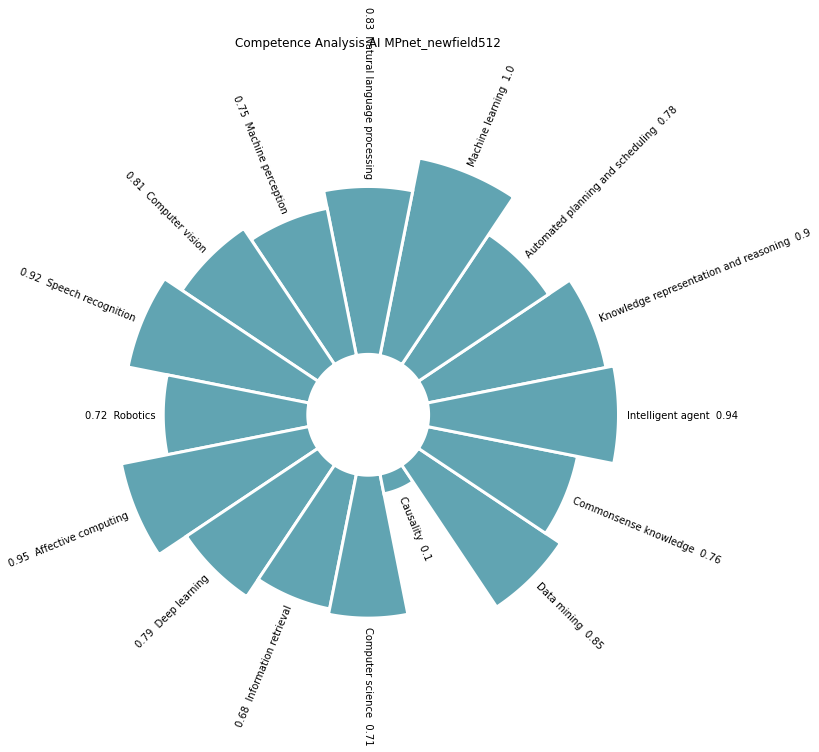

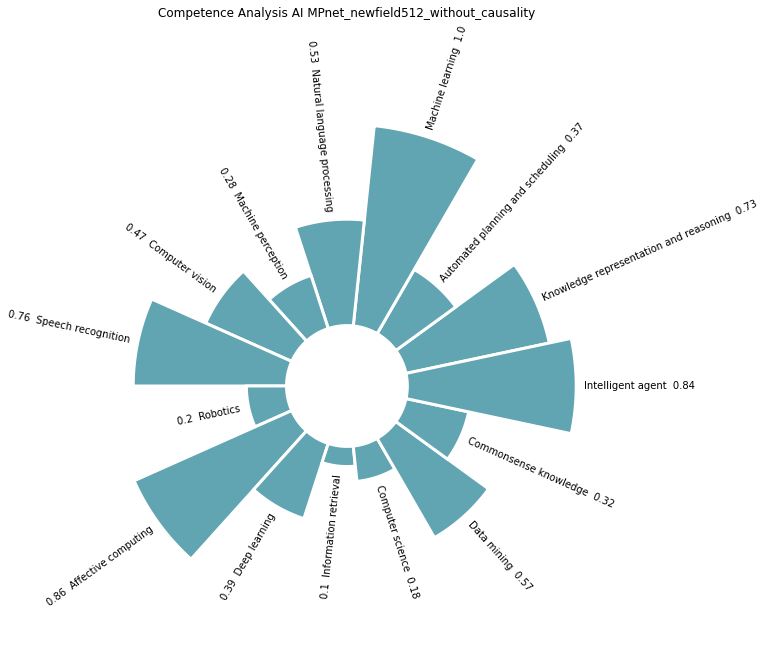

In [ ]:
# MPnet_alg_ckai()

In [ ]:
"""
Calculates values with all-mpnet-base-v2 model.
Best listed model for sentence embedding: https://www.sbert.net/docs/pretrained_models.html.
Similarity is determined by comparing word vectors or “word embeddings”, multi-dimensional meaning representations of a word.
"""
def MPnet_alg_withoutcausality_per_job_ckai():
    # User Feedback
    print(f"\t> Now computing cosine similarity per job.")
    
    df = retrieve_dataframe(link_mpnet_alg_newfield_without_causality_csv)
    master_values = df['Value'].to_list()
    master_names = df['Competence_Name'].to_list()

    df = retrieve_dataframe(link_areas)
    comps_list = df['NEW'].values.tolist()
    comp_names_list = df['Competence_Name'].values.tolist()

    comps_list.pop(12)
    comp_names_list.pop(12)

    new_comps_list = []
    for comp, comp_name in zip(comps_list, comp_names_list):
        (first, second) = comp.split('_')
        name_ckai = f"{first}{second}_{comp_name}"
        new_comps_list.append(name_ckai)

    model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

    comp_text_list = []
    for comp in new_comps_list:
        comp_link = link_field_text_new + '/' + comp + '.txt'
        with open(comp_link, 'r', encoding="utf-8") as f:
            text = f.read()
            model_text = model.encode(text)
            comp_text_list.append(model_text)

    total_value_list = []

    jobs = os.listdir(link_pages)
    job_ids = [int(job.split('_')[0]) for job in jobs]

    for job in jobs:
        job_link = link_pages + '/' + job
        with open(job_link, 'r', encoding="utf-8") as f:
            job_text = f.read()
        model_job = model.encode(job_text)

        score_list = [cos_sim(model_job, model_comp) for model_comp in comp_text_list]
        fitted = value_fitting(score_list)

        difference_fitted_and_master = cosine_similarity([fitted], [master_values])[0][0]
        fitted.append(difference_fitted_and_master)
        total_value_list.append(fitted)
    
    comps_list = sorted(comps_list)
    store_df_withoutcausality_withoveralsimilarity(comps_list, job_ids, master_names, link_mpnet_alg_newfield_score_per_job_csv, total_value_list)

In [ ]:
"""
Stores Dataframe
"""
def store_df_withoutcausality_withoveralsimilarity(ids, job_ids, names, link, values):
    dict_df = {}
    similarity_row_name = "Master_Similarity"

    total_values = []
    length = len(ids)+1
    for i in range(length):
        new_values = [value_list[i] for value_list in values]
        total_values.append(new_values)

    new_names = [f"{name}_{id}" for name, id in zip(names, ids)]
    new_names.append(similarity_row_name)

    for name, total_value in zip(new_names, total_values):
        dict_df[name] = total_value

    df = pd.DataFrame(dict_df)
    df.index = job_ids

    df = df.sort_values(by=[similarity_row_name])
    df = df[::-1]

    df.to_csv(link, sep=',', float_format='%.2f')

In [ ]:
"""
Calculates values with all-mpnet-base-v2 model.
Best listed model for sentence embedding: https://www.sbert.net/docs/pretrained_models.html.
Similarity is determined by comparing word vectors or “word embeddings”, multi-dimensional meaning representations of a word.
"""
def MPnet_alg_withoutcausality_per_job():
    # User Feedback
    print(f"\t> Now computing cosine similarity per job.")
    
    df = retrieve_dataframe(link_mpnet_alg_newfield512_without_causality_csv) #link_mpnet_alg_without_causality_csv
    master_values = df['Value'].to_list()
    master_names = df['Competence_Name'].to_list()

    comps = os.listdir(link_field_text)
    comps.pop(12)

    ids = [comp.split('.')[0] for comp in comps]
    model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

    max_length = 512
    model.max_seq_length = max_length

    comp_text_list = []
    for comp in comps:
        comp_link = link_field_text + '/' + comp
        with open(comp_link, 'r', encoding="utf-8") as f:
            text = f.read()
            model_text = model.encode(text)
            comp_text_list.append(model_text)

    total_value_list = []

    jobs = os.listdir(link_pages)
    job_ids = [int(job.split('_')[0]) for job in jobs]

    for job in jobs:
        job_link = link_pages + '/' + job
        with open(job_link, 'r', encoding="utf-8") as f:
            job_text = f.read()
        model_job = model.encode(job_text)

        score_list = [cos_sim(model_job, model_comp) for model_comp in comp_text_list]
        fitted = value_fitting(score_list)

        difference_fitted_and_master = cosine_similarity([fitted], [master_values])[0][0]
        fitted.append(difference_fitted_and_master)
        total_value_list.append(fitted)
    
    store_df_withoutcausality_withoveralsimilarity(ids, job_ids, master_names, link_mpnet_alg_score_per_job_csv, total_value_list)

In [ ]:
"""
Stores Dataframe
"""
def store_df_without_causality(ids, link, scores):
    # To exaggerate the differences and normalize
    L = scores
    mini, maxi = 0.1, 1
    normal = list(map(lambda x, r=float(max(L) - min(L)): ((x - min(L)) / r)*(maxi - mini) + mini, L))

    df = pd.DataFrame(
            {
                'Competence_Name': ['Knowledge representation and reasoning',
                    'Automated planning and scheduling', 'Machine learning',
                    'Natural language processing', 'Machine perception',
                    'Computer vision', 'Speech recognition', 'Robotics',
                    'Affective computing', 'Deep learning', 'Information retrieval',
                    'Computer science', 'Data mining',
                    'Commonsense knowledge', 'Intelligent agent'],
                'Competence_ID': ids,
                'Value': normal
            })

    df.sort_values('Competence_ID', inplace=True)

    df.to_csv(link, sep=',', float_format='%.2f')
    return df

In [ ]:
"""
Stores Dataframe
"""
def store_df(ids, link, scores):
    # To exaggerate the differences and normalize
    L = scores
    mini, maxi = 0.1, 1
    normal = list(map(lambda x, r=float(max(L) - min(L)): ((x - min(L)) / r)*(maxi - mini) + mini, L))

    df = pd.DataFrame(
            {
                'Competence_Name': ['Knowledge representation and reasoning',
                    'Automated planning and scheduling', 'Machine learning',
                    'Natural language processing', 'Machine perception',
                    'Computer vision', 'Speech recognition', 'Robotics',
                    'Affective computing', 'Deep learning', 'Information retrieval',
                    'Computer science', 'Causality', 'Data mining',
                    'Commonsense knowledge', 'Intelligent agent'],
                'Competence_ID': ids,
                'Value': normal
            })

    df.sort_values('Competence_ID', inplace=True)

    df.to_csv(link, sep=',', float_format='%.2f')
    return df

In [ ]:
"""
Plotting DataFrame
"""
def plotting(df, link_jpg, name_alg):
    print("\t> Now storing and plotting {} alg.".format(name_alg))

    # initialize the figure
    plt.figure(figsize=(11,10))
    ax = plt.subplot(111, polar=True)
    plt.axis('off')

    # Add title
    full_title = 'Competence Analysis AI ' + name_alg
    plt.title(full_title, pad=70)

    # Set the coordinates limits
    lowerLimit = 30

    # Compute the width of each bar. In total we have 2*Pi = 360°
    width = 2*np.pi / len(df.index)

    # Compute the angle each bar is centered on:
    indexes = list(range(1, len(df.index)+1))
    angles = [element * width for element in indexes]

    # Adjust new labels
    values = df["Value"]
    labels = df["Competence_Name"]

    # Make the plot better readible
    heights = values*100

    # Draw bars
    bars = ax.bar(
        x=angles, 
        height=heights, 
        width=width, 
        bottom=lowerLimit,
        linewidth=3, 
        edgecolor="white",
        color="#61a4b2",
    )

    # little space between the bar and the label
    labelPadding = 4

    # Add labels
    for _, angle, height, label, value in zip(bars, angles, heights, labels, values):
        # Labels are rotated. Rotation must be specified in degrees
        rotation = np.rad2deg(angle)

        # Flip some labels upside down
        alignment = ""
        if angle >= np.pi/2 and angle < 3*np.pi/2:
            alignment = "right"
            rotation = rotation + 180
            new_label = str(round(value, 2)) + '  ' + label
        else: 
            alignment = "left"
            new_label = label + '  ' + str(round(value, 2))

        # Finally add the labels
        ax.text(
            x=angle, 
            y=lowerLimit + height + labelPadding, 
            s=new_label, 
            ha=alignment, 
            va='center', 
            rotation=rotation, 
            rotation_mode="anchor")

    plt.savefig(link_jpg)